In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

__1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?__

In [5]:
math = df['math score']
reading = df['reading score']
writing = df['writing score']

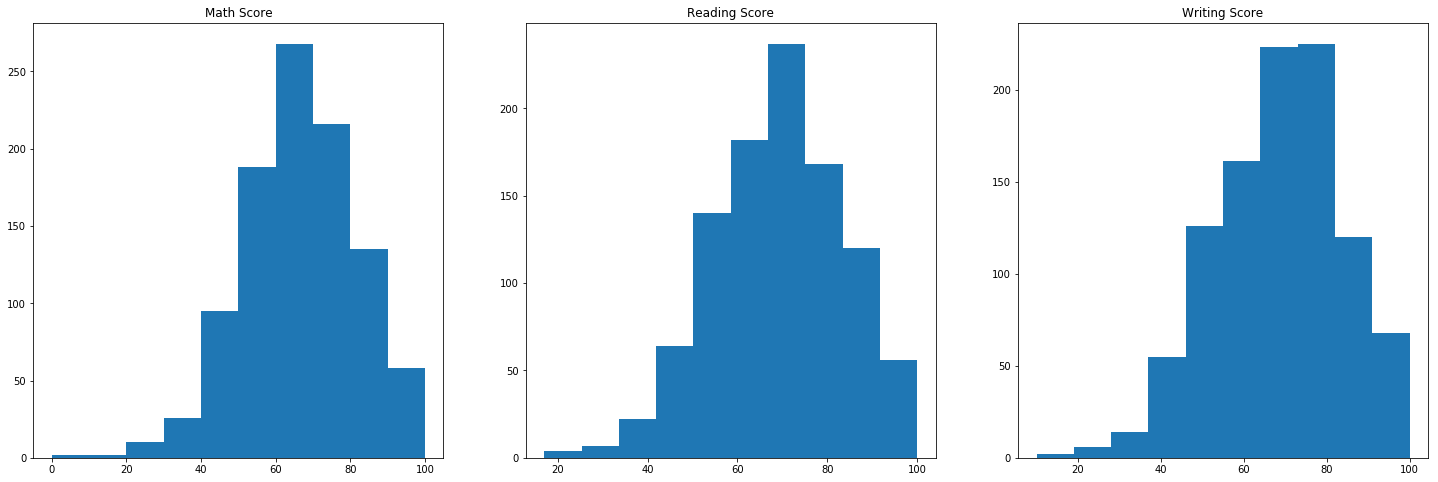

In [7]:
plt.figure(figsize=(25, 8 ))

plt.subplot(1, 3 , 1)
plt.hist(math)
plt.title('Math Score')

plt.subplot(1, 3, 2)
plt.hist(reading)
plt.title('Reading Score')

plt.subplot(1, 3, 3)
plt.hist(writing)
plt.title('Writing Score')

plt.show()

In [9]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest


three = [math, reading, writing]



for subject in three:
    print('Jarque-Bera test statistics is {} and p value is {}'.format(jarque_bera(subject)[0], jarque_bera(subject)[1]))
    print("Normality test statistics is {} and p value is {}".format(normaltest(subject)[0], normaltest(subject)[1]))
    print('')

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836

Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582

Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974



In [17]:
for score in three:
    for i in score:
        if score[i] == 0:
            score[i] += 1

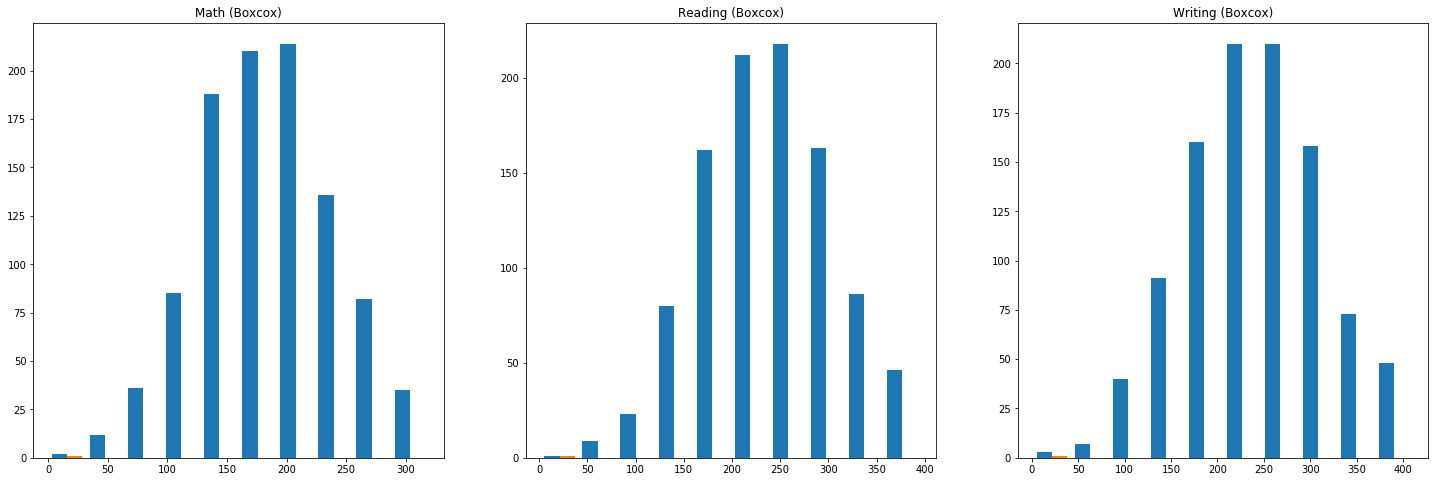

In [19]:
from scipy.stats import boxcox

math_boxcox = boxcox(math)
reading_boxcox = boxcox(reading)
writing_boxcox = boxcox(writing)

plt.figure(figsize=(25, 8))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title('Math (Boxcox)')

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title('Reading (Boxcox)')

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title('Writing (Boxcox)')

plt.show()

In [20]:
for subject in three:
    print('Jarque-Bera test statistics is {} and p value is {}'.format(jarque_bera(subject)[0], jarque_bera(subject)[1]))
    print("Normality test statistics is {} and p value is {}".format(normaltest(subject)[0], normaltest(subject)[1]))
    print('')

Jarque-Bera test statistics is 15.230308642482925 and p value is 0.0004929246076665894
Normality test statistics is 14.829070008237682 and p value is 0.000602432456595843

Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582

Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974



__2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.__

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
 df['target_score'] = (df['math score'] * 0.4) + (df['reading score'] * 0.3) + (df['writing score'] * 0.3)

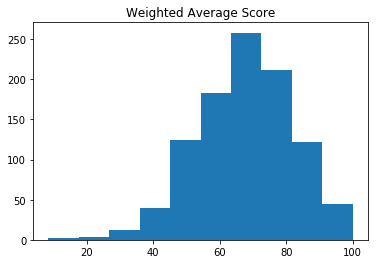

In [28]:
plt.hist(df['target_score'])
plt.title('Weighted Average Score')
plt.show()

In [29]:
jb_weighted = jarque_bera(df['target_score'])
normal_weighted = normaltest(df['target_score'])

print('Jarque-Bera test statistics is {} and p value is {}'.format(jb_weighted[0], jb_weighted[1]))
print("Normality test statistics is {} and p value is {}".format(normal_weighted[0], normal_weighted[1]))

Jarque-Bera test statistics is 15.738607518710893 and p value is 0.0003823004426678489
Normality test statistics is 15.462104348474814 and p value is 0.0004389819884855975


__3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?__

In [32]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'target_score'],
      dtype='object')

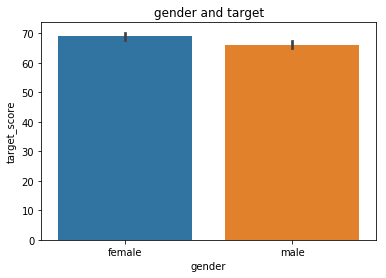

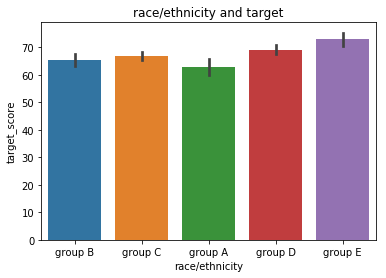

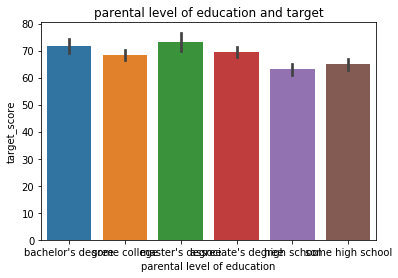

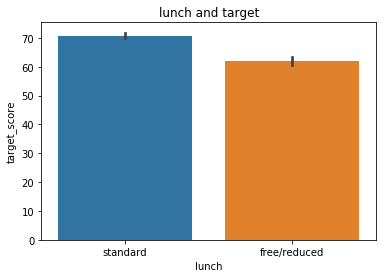

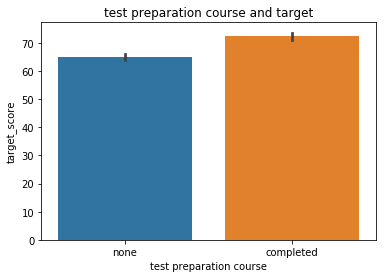

In [33]:
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for feature in features:
    sns.barplot(x=feature, y='target_score', data=df)
    plt.title('{} and target'.format(feature))
    plt.show()

I know from previous work that the test prep and the lunch features were significant. Let's see if this holds up...

In [35]:
stats.ttest_ind(df.loc[df.lunch == 'standard', 'target_score'], df.loc[df.lunch == 'free/reduced', 'target_score'])

Ttest_indResult(statistic=9.890996390043702, pvalue=4.534272239330189e-22)

In [38]:
stats.ttest_ind(df.loc[df['test preparation course'] == 'none', 'target_score'], df.loc[df['test preparation course'] == 'completed', 'target_score'])

Ttest_indResult(statistic=-8.167168738444927, pvalue=9.478486342752209e-16)